In [1]:
%matplotlib inline
%run ../../import_envs.py
print('probtorch:', probtorch.__version__, 
      'torch:', torch.__version__, 
      'cuda:', torch.cuda.is_available())

probtorch: 0.0+5a2c637 torch: 1.0.0 cuda: True


In [11]:
## Load dataset
data_dir = '/home/hao/Research/apg_data'
data_path = data_dir + "/gmm/gmm_10size"
Data = []
for i in range(10):
    data = torch.from_numpy(np.load(data_path + '/obs_%d.npy' % ((i+1)*10))).float()
    Data.append(data)
K = 3 ## number of clusters
D = 2
NUM_HIDDEN_LOCAL = 32
NUM_HIDDEN_GLOBAL = 32
CUDA = torch.cuda.is_available()
DEVICE = torch.device('cuda:1')

PATH = 'lstm-60pts-10samples'
B=1
SAMPLE_SIZE = 1
NUM_LAYERS = 2 

In [15]:
from model_operations_lstm import Init_models, Save_models
models, optimizer = Init_models(K, D, B, SAMPLE_SIZE, NUM_HIDDEN_GLOBAL, NUM_HIDDEN_LOCAL, NUM_LAYERS, CUDA, DEVICE, lr=1e-4, RESTORE=True, PATH=PATH)

In [26]:
from testing import Eval
from viz_mc import Viz_MC
from apg import APG_test
from vae import VAE_test

BATCH_SIZE = 5
Viz_INTERVAL = 4
FS = 5
TITLE_FS = 20
OB_MS = 5.0
MU_MARKER = 'X'
MU_MS = 100
OPACITY = 0.3
BOUND = 12
COLORS = ['#AA3377', '#EE7733', '#0077BB', '#009988']
DATA_PTR = 87

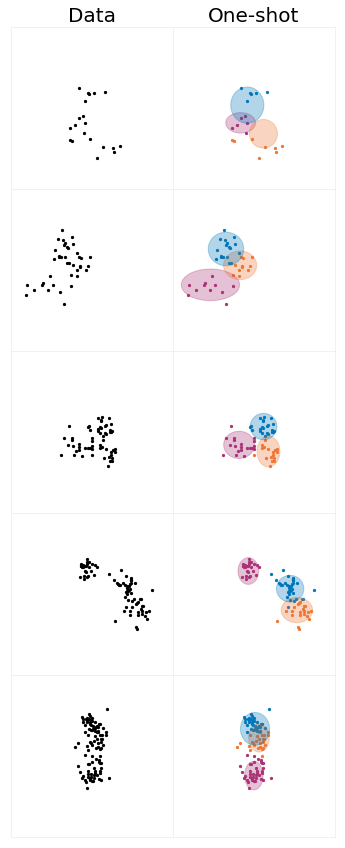

In [27]:
visualizer = Viz_MC(K, Viz_INTERVAL, FS, TITLE_FS, OB_MS, OPACITY, BOUND, COLORS)
evaluator = Eval(models, K, D, BATCH_SIZE, CUDA, DEVICE)

Metrics_sample = evaluator.Test_uniform(VAE_test, Data, DATA_PTR, mcmc_steps=None, sample_size=SAMPLE_SIZE)
visualizer.Plot_chains(Metrics_sample['data'], Metrics_sample['samples'], filename='gmm-samples-%d' % DATA_PTR)

In [ ]:
L = 1000
Metrics_converge = evaluator.Test_uniform(APG_test, Data, DATA_PTR, mcmc_steps=30, sample_size=L)
visualizer.Plot_metrics(Metrics_converge['log_joint'], Metrics_converge['ess'], sample_size=L, filename='gmm-metrics-LL-ESS-%d' % DATA_PTR)